In [119]:
import scipy
import numpy as np
import re
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use("ggplot")

In [120]:
db = pd.read_csv("ytdaily/BR_youtube_trending_data.csv")

# Análise Exploratória

## Banco de Dados

Utilizamos nesse trabalho um banco de dados que contém informações sobre os vídeos que entraram em trending no youtube entre o período de 2018-2021. Nossos dados contêm informações como o ID do vídeo no youtube, seu título, categoria e o canal de origem, assim como data de publicação e data de trend, número de comentários, likes e dislikes e contagem de views.

Nosso objetivo com a análise desse banco de dados é identificar algumas características similares dos vídeos do banco de dados para que possamos entender melhor sobre quais características são mais correlacionadas com o sucesso do vídeo na plataforma ou em seu engajamento social.

In [121]:
db

,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description
0,s9FH4rDMvds,LEVEI UM FORA? FINGI ESTAR APAIXONADO POR ELA!,2020-08-11T22:21:49Z,UCGfBwrCoi9ZJjKiUK8MmJNw,Pietro Guedes,22,2020-08-12T00:00:00Z,pietro|guedes|ingrid|ohara|pingrid|vlog|amigos...,263835,85095,487,4500,https://i.ytimg.com/vi/s9FH4rDMvds/default.jpg,False,False,"Salve rapaziada, neste vídeo me declarei pra e..."
1,jbGRowa5tIk,ITZY “Not Shy” M/V TEASER,2020-08-11T15:00:13Z,UCaO6TYtlC8U5ttz62hTrZgg,JYP Entertainment,10,2020-08-12T00:00:00Z,JYP Entertainment|JYP|ITZY|있지|ITZY Video|ITZY ...,6000070,714310,15176,31040,https://i.ytimg.com/vi/jbGRowa5tIk/default.jpg,False,False,ITZY Not Shy M/V[ITZY Official] https://www.yo...
2,3EfkCrXKZNs,Oh Juliana PARÓDIA - MC Niack,2020-08-10T14:59:00Z,UCoXZmVma073v5G1cW82UKkA,As Irmãs Mota,22,2020-08-12T00:00:00Z,OH JULIANA PARÓDIA|MC Niack PARÓDIA|PARÓDIAS|A...,2296748,39761,5484,0,https://i.ytimg.com/vi/3EfkCrXKZNs/default.jpg,True,False,Se inscrevam meus amores! 📬 Quer nos mandar al...
3,gBjox7vn3-g,Contos de Runeterra: Targon | A Estrada Tortuosa,2020-08-11T15:00:09Z,UC6Xqz2pm50gDCORYztqhDpg,League of Legends BR,20,2020-08-12T00:00:00Z,Riot|Riot Games|League of Legends|lol|trailer|...,300510,46222,242,2748,https://i.ytimg.com/vi/gBjox7vn3-g/default.jpg,False,False,Você se unirá aos Lunari e aos Solari em Targo...
4,npoUGx7UW7o,Entrevista com Thammy Miranda | The Noite (10/...,2020-08-11T20:04:02Z,UCEWOoncsrmirqnFqxer9lmA,The Noite com Danilo Gentili,23,2020-08-12T00:00:00Z,The Noite|The Noite com Danilo Gentili|Danilo ...,327235,22059,3972,2751,https://i.ytimg.com/vi/npoUGx7UW7o/default.jpg,False,False,Danilo Gentili recebe Thammy Miranda. Após pas...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38788,Uy4_C6Ev8S8,"Sam Fischer, Demi Lovato - What Other People S...",2021-02-16T16:00:19Z,UCkW1W1_0rANDKlAa3HYwmXA,SamFischerVEVO,10,2021-02-25T00:00:00Z,sam fischer|demi lovato|demi|what other people...,3133410,167396,1557,8033,https://i.ytimg.com/vi/Uy4_C6Ev8S8/default.jpg,False,False,Sam Fischer & Demi Lovato – What Other People ...
38789,JM-NqFX2jU8,DOTA: Dragon's Blood | Date Announcement | Net...,2021-02-17T00:00:00Z,UCWOA1ZGywLbqmigxE4Qlvuw,Netflix,24,2021-02-25T00:00:00Z,Dota Dragon's Blood|Ashley Miller|Valve Studio...,2679121,75437,4159,10175,https://i.ytimg.com/vi/JM-NqFX2jU8/default.jpg,False,False,"The story you've been waiting for, is finally ..."
38790,jR681pwWPm0,"Deve ter sentido que no São Paulo É DIFERENTE,...",2021-02-16T23:26:19Z,UCcndglQZmXnYjgE_Grqt5yg,Gazeta Esportiva,17,2021-02-25T00:00:00Z,gazeta esportiva|GAZETA ESPORTIVA DE HOJE|notí...,151552,4428,101,304,https://i.ytimg.com/vi/jR681pwWPm0/default.jpg,False,False,O recém chegado novo técnico do Tricolor teve ...
38791,Zk5qMdv_BCc,TROLLEI O VICTOR FALANDO QUE ESTOU GOSTANDO DELE,2021-02-15T18:27:12Z,UCpO4C7n86oFyCtlpiVPtcDA,By Pamella,24,2021-02-25T00:00:00Z,pamella libbre|bypamella|entretenimento|videos...,2444745,420309,2722,12439,https://i.ytimg.com/vi/Zk5qMdv_BCc/default.jpg,False,False,"Iae galera, bem vindos a mais um vídeo do cana..."


## Características Importantes

As informações que serão mais utilizadas durante nossa análise dos dados serão:
   * view_count : Principal parâmetro para determinar o sucesso do vídeo dentro dos trendings, a contagem de visualizações determinaria o alcance no vídeo na plataforma.
   * publishedAt | trending_date : A data de publicação e trending dos vídeos nos permite fazer algumas análises sobre o impacto da época do ano, hora do dia, no desempenho do vídeo. Podemos assim, traçar uma certa correlação entre horários e datas que impulsionam ou detrimentam a performance.
   * categoryId : A partir do id da categoria podemos traçar quais as categorias são favorecidas pela plataforma para alcançar o status de trending.
   * tags : As tags são ferramentas que os criadores de conteúdos podem utilizar para realizar conexões entre o conteúdo deles e conteúdo de outrem, e a partir da informação delas queremos traçar o impacto que as tags e sua quantidade realizam no desempenho do vídeo
   * likes | dislikes : Representantes do engajamento com o vídeo por parte da comunidade, os likes e os dislikes, assim como seu ratio podem nos fornecer a capacidade de identificar qual o poder do marketing negativo na plataforma, (falem bem ou falem mal mas falem de mim), assim como verificar qual o impacto que os comentários podem fazer na percepção do vídeo.
   * comment_count | comment_disable: Os comentários são a voz da comunidade sobre o vídeos em questão, a partir do número de comentários gostariamos verificar uma relação entre eles e o ratio de likes e dislikes do vídeo na plataforma.

In [17]:
print("A view_count dos vídeos do banco de Dados")
db[["title", "view_count"]]

A view_count dos vídeos do banco de Dados


,title,view_count
0,LEVEI UM FORA? FINGI ESTAR APAIXONADO POR ELA!,263835
1,ITZY “Not Shy” M/V TEASER,6000070
2,Oh Juliana PARÓDIA - MC Niack,2296748
3,Contos de Runeterra: Targon | A Estrada Tortuosa,300510
4,Entrevista com Thammy Miranda | The Noite (10/...,327235
...,...,...
38788,"Sam Fischer, Demi Lovato - What Other People S...",3133410
38789,DOTA: Dragon's Blood | Date Announcement | Net...,2679121
38790,"Deve ter sentido que no São Paulo É DIFERENTE,...",151552
38791,TROLLEI O VICTOR FALANDO QUE ESTOU GOSTANDO DELE,2444745


In [20]:
print("A publishedAt | trending_date dos vídeos do banco de Dados")
db[["title", "publishedAt", "trending_date"]]

A publishedAt | trending_date dos vídeos do banco de Dados


,title,publishedAt,trending_date
0,LEVEI UM FORA? FINGI ESTAR APAIXONADO POR ELA!,2020-08-11T22:21:49Z,2020-08-12T00:00:00Z
1,ITZY “Not Shy” M/V TEASER,2020-08-11T15:00:13Z,2020-08-12T00:00:00Z
2,Oh Juliana PARÓDIA - MC Niack,2020-08-10T14:59:00Z,2020-08-12T00:00:00Z
3,Contos de Runeterra: Targon | A Estrada Tortuosa,2020-08-11T15:00:09Z,2020-08-12T00:00:00Z
4,Entrevista com Thammy Miranda | The Noite (10/...,2020-08-11T20:04:02Z,2020-08-12T00:00:00Z
...,...,...,...
38788,"Sam Fischer, Demi Lovato - What Other People S...",2021-02-16T16:00:19Z,2021-02-25T00:00:00Z
38789,DOTA: Dragon's Blood | Date Announcement | Net...,2021-02-17T00:00:00Z,2021-02-25T00:00:00Z
38790,"Deve ter sentido que no São Paulo É DIFERENTE,...",2021-02-16T23:26:19Z,2021-02-25T00:00:00Z
38791,TROLLEI O VICTOR FALANDO QUE ESTOU GOSTANDO DELE,2021-02-15T18:27:12Z,2021-02-25T00:00:00Z


In [21]:
print("A categoryId dos vídeos do banco de Dados")
db[["title", "categoryId"]]

A categoryId dos vídeos do banco de Dados


,title,categoryId
0,LEVEI UM FORA? FINGI ESTAR APAIXONADO POR ELA!,22
1,ITZY “Not Shy” M/V TEASER,10
2,Oh Juliana PARÓDIA - MC Niack,22
3,Contos de Runeterra: Targon | A Estrada Tortuosa,20
4,Entrevista com Thammy Miranda | The Noite (10/...,23
...,...,...
38788,"Sam Fischer, Demi Lovato - What Other People S...",10
38789,DOTA: Dragon's Blood | Date Announcement | Net...,24
38790,"Deve ter sentido que no São Paulo É DIFERENTE,...",17
38791,TROLLEI O VICTOR FALANDO QUE ESTOU GOSTANDO DELE,24


In [22]:
print("As tags dos vídeos do banco de Dados")
db[["title", "tags"]]

As tags dos vídeos do banco de Dados


,title,tags
0,LEVEI UM FORA? FINGI ESTAR APAIXONADO POR ELA!,pietro|guedes|ingrid|ohara|pingrid|vlog|amigos...
1,ITZY “Not Shy” M/V TEASER,JYP Entertainment|JYP|ITZY|있지|ITZY Video|ITZY ...
2,Oh Juliana PARÓDIA - MC Niack,OH JULIANA PARÓDIA|MC Niack PARÓDIA|PARÓDIAS|A...
3,Contos de Runeterra: Targon | A Estrada Tortuosa,Riot|Riot Games|League of Legends|lol|trailer|...
4,Entrevista com Thammy Miranda | The Noite (10/...,The Noite|The Noite com Danilo Gentili|Danilo ...
...,...,...
38788,"Sam Fischer, Demi Lovato - What Other People S...",sam fischer|demi lovato|demi|what other people...
38789,DOTA: Dragon's Blood | Date Announcement | Net...,Dota Dragon's Blood|Ashley Miller|Valve Studio...
38790,"Deve ter sentido que no São Paulo É DIFERENTE,...",gazeta esportiva|GAZETA ESPORTIVA DE HOJE|notí...
38791,TROLLEI O VICTOR FALANDO QUE ESTOU GOSTANDO DELE,pamella libbre|bypamella|entretenimento|videos...


In [23]:
print("Os likes | dislikes dos vídeos do banco de Dados")
db[["title", "likes", "dislikes"]]

Os likes | dislikes dos vídeos do banco de Dados


,title,likes,dislikes
0,LEVEI UM FORA? FINGI ESTAR APAIXONADO POR ELA!,85095,487
1,ITZY “Not Shy” M/V TEASER,714310,15176
2,Oh Juliana PARÓDIA - MC Niack,39761,5484
3,Contos de Runeterra: Targon | A Estrada Tortuosa,46222,242
4,Entrevista com Thammy Miranda | The Noite (10/...,22059,3972
...,...,...,...
38788,"Sam Fischer, Demi Lovato - What Other People S...",167396,1557
38789,DOTA: Dragon's Blood | Date Announcement | Net...,75437,4159
38790,"Deve ter sentido que no São Paulo É DIFERENTE,...",4428,101
38791,TROLLEI O VICTOR FALANDO QUE ESTOU GOSTANDO DELE,420309,2722


In [30]:
print("O comment_count | comments_disable dos vídeos do banco de Dados")
db[["title", "comment_count", "comments_disabled"]]

O comment_count | comments_disable dos vídeos do banco de Dados


,title,comment_count,comments_disabled
0,LEVEI UM FORA? FINGI ESTAR APAIXONADO POR ELA!,4500,False
1,ITZY “Not Shy” M/V TEASER,31040,False
2,Oh Juliana PARÓDIA - MC Niack,0,True
3,Contos de Runeterra: Targon | A Estrada Tortuosa,2748,False
4,Entrevista com Thammy Miranda | The Noite (10/...,2751,False
...,...,...,...
38788,"Sam Fischer, Demi Lovato - What Other People S...",8033,False
38789,DOTA: Dragon's Blood | Date Announcement | Net...,10175,False
38790,"Deve ter sentido que no São Paulo É DIFERENTE,...",304,False
38791,TROLLEI O VICTOR FALANDO QUE ESTOU GOSTANDO DELE,12439,False


## Primeira Pergunta

Queremos primeiro verificar se há uma relação entre o horário que os vídeos foram publicados e o sucesso do vídeo na plataforma entre os vídeos em trending.

Para isso vamos agrupar os vídeos pela hora de publicação, utilizando a informação de que a hora reside entre as posições 11 e 13 da string, e obter a média de visualizações entre os vídeos publicados por hora.

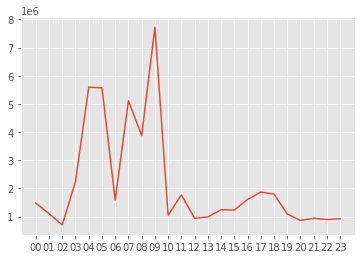

In [122]:
hour_mean = db.groupby(db.publishedAt.str[11:13])["view_count"].mean()

plt.plot(hour_mean)

In [123]:
fp = hour_mean[0:3]
sp = hour_mean[10:]
not_inc_mean = (fp.sum() + sp.sum()) / (fp.size + sp.size)

diff = hour_mean[3:10].mean() - not_inc_mean
ratio_diff = diff / not_inc_mean

print("As horas no pico tendem a performar {:.3}x melhor que os vídeos fora desse período".format(ratio_diff))

As horas no pico tendem a performar 2.75x melhor que os vídeos fora desse período


Temos que, mesmo adicionando os vídeos publicado às 6horas que performam a abaixo da média dos vídeos em horário de pico, os vídeos publicados entre 3 e 10 horas performam em média quase que três vezes melhor que os vídeos fora de horário de pico, o que nos leva a acreditar que há sim uma correlação entre o horário publicado e a performance do vídeo

# Segunda pergunta

Nosso segundo teste de hipótese busca identificar o impacto das tags no sucesso do vídeo dentro da plataforma.
Para isso nós parsearemos a lista de tags que possuímos no nosso banco de dados e analisaremos o sucesso de cada tag no sistema, com base nos vídeos que também a contém.

Em seguida, nós verificaremos qual a proporção de vídeos que performam acima da média dado que possuem uma determinada tag e analisaremos a diferença entre a média de visualizações de cada tag individualmente em comparação aos vídeos que não a possuem.

In [116]:
from operator import itemgetter 

def getAllTags (db: pd.DataFrame) -> dict:
    alltags = dict()
    for tags in db.tags:
        
        tags = tags.split("|")
        for tag in tags:
            if tag in alltags:
                alltags[tag] += 1
            else:
                alltags[tag] = 1
    return alltags

alltags = getAllTags(db)

alltags_sorted = sorted(alltags.items(), key=itemgetter(1), reverse=True)[ : 600 ]
alltags_wmean = dict()

total_average = db["view_count"].mean()

hl = np.array([[0, .0], [0, .0]])
rs = np.array([0, .0])

for tag, size in alltags_sorted:
    
    means = db.groupby(db.tags.str.contains(tag))["view_count"].mean()
    
    tags = [ tag, "Does Not Match", "Total Average" ]
    
    try: 
        means[1], means[0]
    except KeyError:
        continue
    
    means = [ 0 if means.size == 1 else means[1], means[0], total_average]
    
    # plt.bar(x = tags, height=means)
    # plt.show()
    
    hl[ 0 if means[0] >= total_average else 1, : ] += np.array([1, means[0]])
    rs += np.array([1, means[0] - means[1]])

In [118]:
diff = hl[0, 1] / hl[0, 0] - hl[1, 1] / hl[1, 0]
ratio_diff = diff / total_average

print("Tags não parecem auxiliar no sucesso de um vídeo sozinhas dado que {0} vídeos performam abaixo da média geral e {1} acima, com um desempenho geral de {2:.3}x abaixo da média".
     format(hl[0, 0], hl[1, 0], rs[1] / rs[0]))

print("As tags que performam acima da média performam, em média, {:.3}x melhor que a média geral.".format(ratio_diff))

Tags não parecem auxiliar no sucesso de um vídeo sozinhas dado que 124.0 vídeos performam abaixo da média geral e 473.0 acima, com um desempenho geral de -3.47e+05x abaixo da média
Entretanto, as tags que performam acima da média performam, em média, 1.63x melhor que a média geral.


Essa análise de hipótese nos fez chegar a surpreendente conclusão de tags, individualmente, não interferem tanto no sucesso de um vídeo, com a maioria das tags performando de maneira negativa em relação a tag, entretanto, o grupo de tags que performa melhor que a média total, performa significantivamente melhor que a média, aproximadamente 2 vezes.
Isto pode apontar tanto que existem tags que influenciam na performance do vídeo na plataforma ou que determinados assuntos são mais procurados pela plataforma.

# Terceira Pergunta

A quantidade de tags de um vídeo influenciam seu sucesso nos trendings do youtube?

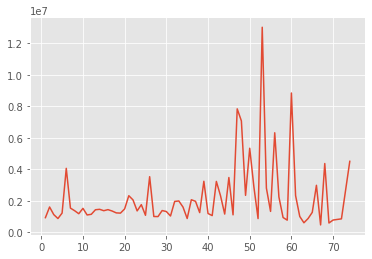

In [129]:
tag_mean = db.groupby(db.tags.str.split("|").str.len())["view_count"].mean()
sz = db.groupby(db.tags.str.split("|").str.len()).size()

plt.plot(tag_mean)

# Quarta Pergunta

Qual a categoria de vídeo com o maior número de views dentre os trendings do youtube?<br>
**Hipótese Nula:** Independente da categoria do vídeo todos têm, aproximadamente, o mesmo número de views.

In [124]:
dj = pd.read_json("ytdaily/US_category_id.json")
n = dj["items"].count()
category = []
indice = []
for i in range(n):
    title = dj["items"][i]["snippet"]["title"]
    id_cat = int(dj["items"][i]["id"])
    category.append(title)
    indice.append(id_cat)
cat = pd.DataFrame({"categoryId": indice, "Category": category})
cat

,categoryId,Category
0,1,Film & Animation
1,2,Autos & Vehicles
2,10,Music
3,15,Pets & Animals
4,17,Sports
5,18,Short Movies
6,19,Travel & Events
7,20,Gaming
8,21,Videoblogging
9,22,People & Blogs


In [125]:
new_db = db.groupby(["categoryId"]).mean()
new_db = new_db.reset_index()
new_db

,categoryId,view_count,likes,dislikes,comment_count,comments_disabled,ratings_disabled
0,1,1.544891e+06,84863.314088,1619.586605,5749.967667,0.000000,0.000000
1,2,3.054760e+05,34053.035264,277.078086,1759.229219,0.000000,0.000000
2,10,3.147671e+06,234845.984815,4866.101131,27485.200973,0.004565,0.001489
3,15,1.202775e+05,17954.000000,154.058824,862.411765,0.000000,0.000000
4,17,6.776024e+05,33452.522336,713.846203,2133.743140,0.000000,0.012444
5,19,1.917385e+05,18796.012346,362.703704,1088.617284,0.345679,0.061728
6,20,1.884874e+06,127486.128421,2284.038246,6382.492982,0.005263,0.001404
7,22,7.511230e+05,82155.185469,1102.678505,4088.859564,0.017409,0.009517
8,23,8.649991e+05,82819.008099,1328.654968,3167.062095,0.026458,0.000000
9,24,9.830380e+05,101359.852947,1434.284007,6171.481966,0.017003,0.001546


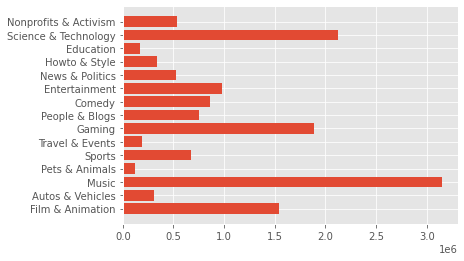

In [126]:
new_db = new_db.merge(cat, on="categoryId")
plt.barh(y = new_db["Category"], width=new_db["view_count"])
plt.show()

# Quinta pergunta

Qual a chance de um vídeo da categoria 'Sports' ter o mesmo número de views de um vídeo da categoria 'Music'?

In [127]:
def calcula_IC(df, target):
    mean = df[target].mean(axis = 0)
    std = df[target].std(axis = 0)
    n = df[target].count()
    xt = mean
    aux = (1.96*(std/(n**(1/2))))
    inferior = xt - aux
    superior = xt + aux
    
    return [ inferior, superior ]

intervalo_music = calcula_IC(db[db["categoryId"] == 10], "view_count")
intervalo_sport = calcula_IC(db[db["categoryId"] == 17], "view_count")
print(intervalo_music)
print(intervalo_sport)

[2958525.6331061013, 3336815.622153923]
[641295.2629986953, 713909.5627830534]


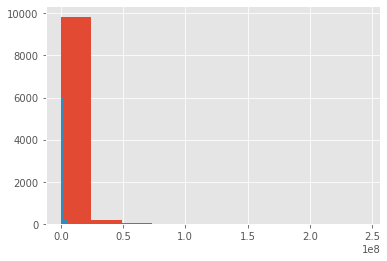

In [128]:
plt_db = db[db["categoryId"] == 10]
plt.hist(plt_db["view_count"], bins= 10)
plt_db = db[db["categoryId"] == 17]
plt.hist(plt_db["view_count"], bins= 10)
plt.show()